In [1]:
!ls
# Numerical Imporst 
import pandas as pd
import numpy as np
import scipy 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Python 
import os

# sklearn 
from sklearn.metrics import f1_score # f1_score(y_true, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# scipy
from scipy.cluster import hierarchy as hc # for dendograms 



Full-Copy10.ipynb  Full-Copy4.ipynb  Full-Copy9.ipynb  test_cli.tsv
Full-Copy11.ipynb  Full-Copy5.ipynb  Full.ipynb        test_pro.tsv
Full-Copy1.ipynb   Full-Copy6.ipynb  README.txt        train_cli.tsv
Full-Copy2.ipynb   Full-Copy7.ipynb  start.ipynb       train_pro.tsv
Full-Copy3.ipynb   Full-Copy8.ipynb  sum_tab_1.csv


In [2]:
df_train_pro = pd.read_table(f'{os.getcwd()}/train_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_pro = pd.read_table(f'{os.getcwd()}/test_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_cli = pd.read_csv(f'{os.getcwd()}/train_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_test_cli = pd.read_csv(f'{os.getcwd()}/test_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_train_mislabel = pd.read_csv(f'{os.getcwd()}/sum_tab_1.csv', 
                           low_memory=False,)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
# df_train_pro
# df_test_pro
# df_train_cli
# df_test_cli
# df_train_mislabel

In [3]:
# Come back to the way you handle this NA, sophisticated way will imporve by at least 5% 
train_pro = df_train_pro.copy(deep=True)
train_pro = train_pro.fillna(train_pro.mean())
train_pro.index.name = 'sample'


test_pro = df_test_pro.copy(deep=True)
test_pro = test_pro.fillna(test_pro.mean())
test_pro.index.name = 'sample'

# df_train_pro
# train_pro
# df_test_pro
# test_pro

In [4]:
train_cli = df_train_cli.copy(deep=True)
train_cli = train_cli.set_index('sample')
train_cli = train_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

test_cli = df_test_cli.copy(deep=True)
test_cli = test_cli.set_index('sample')
test_cli = test_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})
# df_train_cli
# train_cli
# df_test_cli
# test_cli

In [5]:
train_mislabel = df_train_mislabel.copy(deep=True)
train_mislabel = train_mislabel.set_index('sample')

# df_train_mislabel
# train_mislabel

In [6]:
train_pro.reset_index(drop=True, inplace=True)
train_cli.reset_index(drop=True, inplace=True)
train_mislabel.reset_index(drop=True, inplace=True)
# train_pro
# train_cli
# train_mislabel
train_combined = pd.concat([train_mislabel, train_cli, train_pro], axis=1)
# train_combined

### final parameters based on the importance on full dataset 

1. ANP32E                         0.202813
2. msi                            0.122349
3. AGRN                           0.104420
4. RAD50                          0.087882
5. CASK                           0.066713
6. MYO5B                          0.065782
7. XPNPEP1                        0.063634
8. FMNL1                          0.049491
9. CES2                           0.046209
10. GBP2                          0.031256
11. KLC4                          0.031149
12. ARFIP1                        0.030896
13. gender                        0.023883


In [7]:
train_final2 = train_combined [['gender',
                                'ANP32E', 
                                'RAD50', 
                                'MYO5B', 
                                'CES2', 
                                'GBP2',
                                'msi']]


columns = train_final2.columns

# train_final2
# train_combined

In [8]:
X_final2_train, X_final2_valid, y_final2_train, y_final2_valid = train_test_split(train_final2.values.astype(int),
                                                                                  train_combined.mismatch.values, 
                                                                                  test_size=0.3)

 1) msi                            0.198706
 2) ANP32E                         0.176482
 3) RAD50                          0.172321
 4) CES2                           0.162040
 5) gender                         0.118417
 6) GBP2                           0.095733
 7) MYO5B                          0.076301


<BarContainer object of 7 artists>

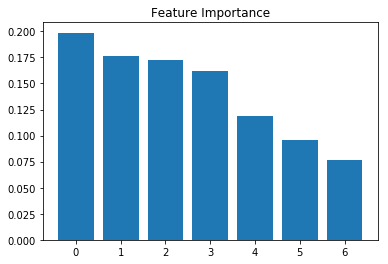

In [9]:
final2_forest = RandomForestClassifier(n_estimators=500, 
                                      min_samples_leaf=5,
                                      max_features=None,
                                      n_jobs=-1,
                                      oob_score=True)

final2_forest.fit(X_final2_train, y_final2_train)

final2_importances = final2_forest.feature_importances_
final2_indices = np.argsort(final2_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30, columns[final2_indices[f]], final2_importances[final2_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_final2_train.shape[1]), final2_importances[final2_indices], align='center')

In [10]:
y_final2_pred = final2_forest.predict(X_final2_valid)
print('Random Forest: \n', classification_report(y_true=y_final2_valid, y_pred=y_final2_pred))
print('OOB score: ', final2_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       0.88      1.00      0.93        21
          1       0.00      0.00      0.00         3

avg / total       0.77      0.88      0.82        24

OOB score:  0.8392857142857143


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
final2_select = SelectFromModel(final2_forest, threshold=0.05)

final2_select.fit(X_final2_train, y_final2_train)

X_final2_important_train = final2_select.transform(X_final2_train)
X_final2_important_train_df = pd.DataFrame(X_final2_important_train)
X_final2_important_valid = final2_select.transform(X_final2_valid)
final2_forest.fit(X_final2_important_train, y_final2_train)
y_final2_pred = final2_forest.predict(X_final2_important_valid)
print('Random Forest: \n', classification_report(y_true=y_final2_valid, y_pred=y_final2_pred))
print('OOB score: ', final2_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       0.88      1.00      0.93        21
          1       0.00      0.00      0.00         3

avg / total       0.77      0.88      0.82        24

OOB score:  0.8392857142857143


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


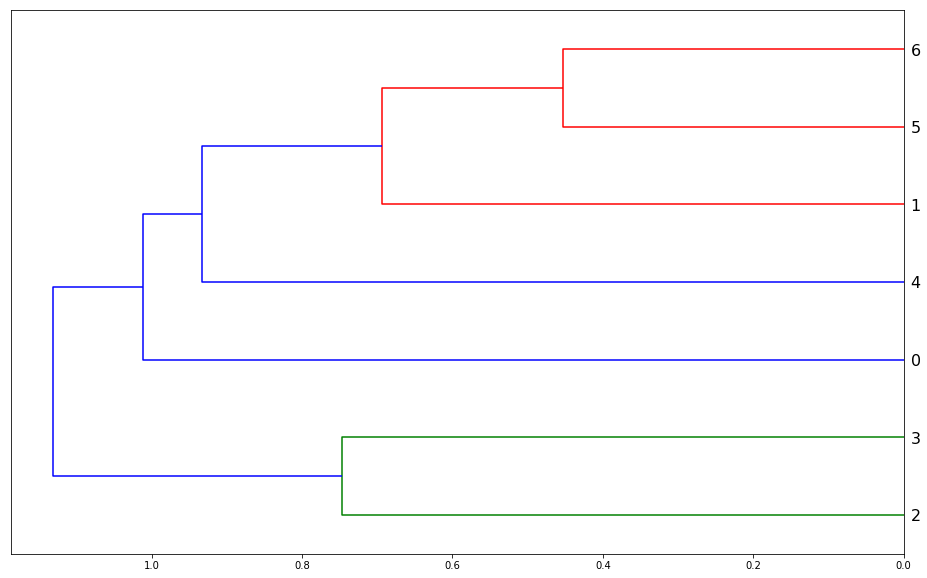

In [12]:
final2_corr = np.round(scipy.stats.spearmanr(X_final2_important_train).correlation, 4)
final2_corr_condensed = hc.distance.squareform(1-final2_corr)
final2_z = hc.linkage(final2_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
final2_dendrogram = hc.dendrogram(final2_z, labels=X_final2_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()

1. ANP32E                         0.176482
2. RAD50                          0.172321
3. CES2                           0.162040
4. GBP2                           0.095733
5. MYO5B                          0.076301


In [14]:
train_combined[['ANP32E', 'RAD50', 'CES2', 'GBP2', 'MYO5B', 'mismatch']]

,ANP32E,RAD50,CES2,GBP2,MYO5B,mismatch
0,2.647740,3.504539,2.525761,1.508617,1.580094,0
1,2.473567,3.240435,3.727143,1.020462,2.359771,1
2,3.259689,3.152559,4.795717,2.075693,2.383550,0
3,2.234228,3.003562,4.026821,1.635079,2.324518,0
4,2.552272,3.246314,1.319857,2.075693,1.094128,0
5,3.267681,2.480638,1.815512,1.775332,2.998619,0
6,3.549608,2.116074,2.652122,3.946711,2.324518,0
7,2.840361,3.104804,2.785553,2.602116,2.051357,0
8,2.537823,4.045867,3.691113,1.688451,1.614153,0
9,2.752047,3.994961,4.417137,2.172840,1.129503,1
